In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
dataPath = '/content/drive/MyDrive/datasets/Housing.csv'
rawData = pd.read_csv(dataPath, decimal='.')

rawData

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [130]:
def normalize(A):

  A = np.array(A)
  maxA, minA = np.max(A), np.min(A)

  nA = (A - minA) / (maxA - minA)
  return nA.tolist()

In [131]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

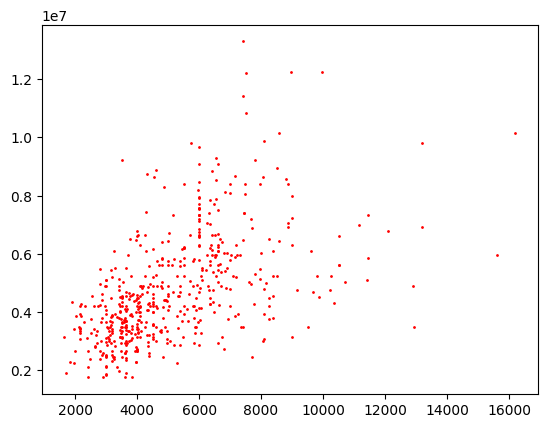

In [132]:
area = np.array(rawData['area'])
price = np.array(rawData['price'])

ax = plt.scatter(area, price, s = 1, color = "red")

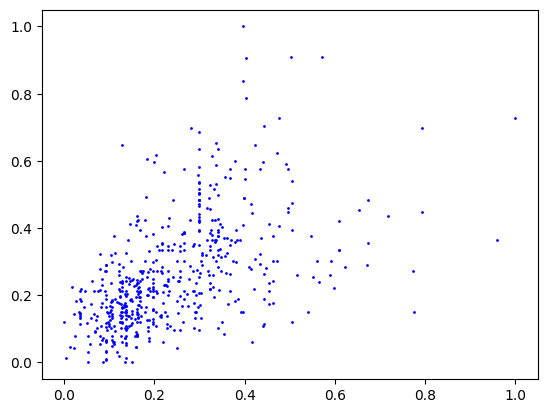

In [133]:
nArea = np.array(normalize(area))
nPrice = np.array(normalize(price))

ax = plt.scatter(nArea, nPrice, s = 1, color = "blue")

In [134]:
w = 0
b = 0

X = nArea
Y = nPrice

In [135]:
def part_der_W(X, Y, w, b):

  m = len(X)

  L = [(w*x + b - y)*x for x, y in zip(X, Y)]

  return (1/m)*sum(L)

In [136]:
def part_der_B(X, Y, w, b):

  m = len(X)

  L = [w*x + b - y for x, y in zip(X, Y)]

  return (1/m)*sum(L)

In [137]:
def cost(X, Y, w, b):

  m = len(X)

  return (1/(2*m))*sum([(w*x + b - y)**2 for x, y in zip(X, Y)])

In [138]:
B = []
W = []
J = []

def gradient_descent(X, Y, initial_weight, initial_bias, epochs, alpha):

  w = initial_weight
  b = initial_bias

  assert len(X) == len(Y), "not matching dimensions"

  for epoch in range(epochs):

    tmp_w = w - alpha * part_der_W(X, Y, w, b)
    tmp_b = b - alpha * part_der_B(X, Y, w, b)

    w = tmp_w
    b = tmp_b

    W.append(w)
    B.append(b)

    c = abs(cost(X, Y, w, b))

    J.append(c)

  return {"w": w, "b": b}

nwb = gradient_descent(X, Y, w, b, 1000, 0.5)
nw, nb = nwb["w"], nwb["b"]

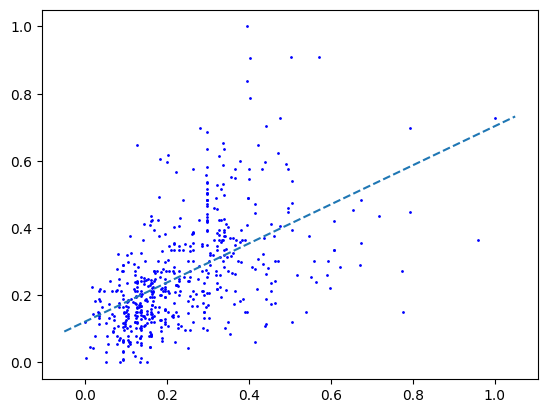

In [139]:
plt.scatter(X, Y, s = 1, color = "blue")
abline(nw, nb)

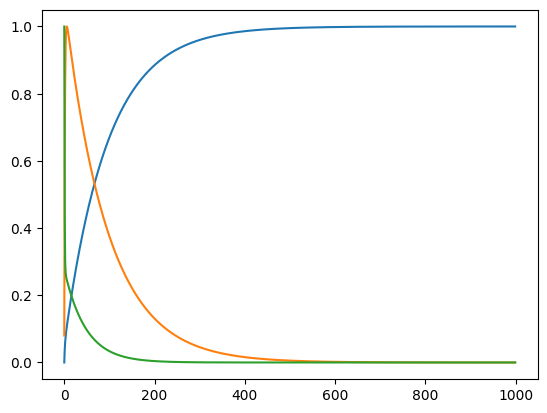

In [140]:
nW = normalize(W)
nB = normalize(B)
nJ = normalize(J)


plt.plot(nW)
plt.plot(nB)
plt.plot(nJ)

In [141]:
def denormalize(X, Y, nW, nB):

    maxX = np.max(X)
    minX = np.min(X)
    maxY = np.max(Y)
    minY = np.min(Y)

    w = nW * ((maxY - minY) / (maxX - minX))
    b = nB * (maxY - minY) + minY - (w * minX)

    return {"w": w, "b": b}

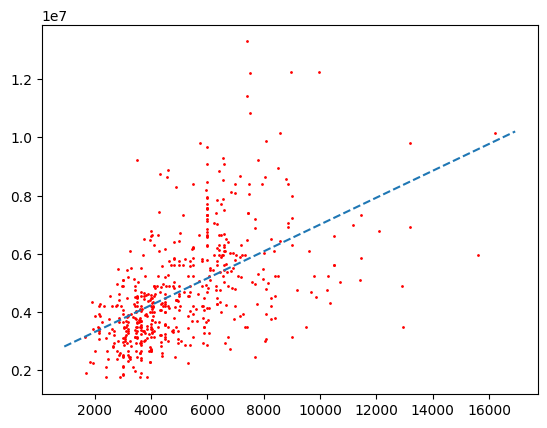

In [142]:
w = denormalize(area, price, nw, nb)["w"]
b = denormalize(area, price, nw, nb)["b"]


plt.scatter(area, price, s = 1, color = "red")
abline(w, b)

In [143]:
def predict(input, w, b):

  return w * input + b

In [144]:
predict(8001, w, b)

6083539.19978557

In [145]:
wt = np.linspace(w-0.1, w+0.1, 201)
bt = np.linspace(b-500, b+500, 201)

#wt = np.linspace(0, 500, 201)
#bt = np.linspace(0, 100, 201)

ww, bb = np.meshgrid(wt, bt)

jj = np.zeros(ww.shape)

for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    jj[i, j] = cost(area, price, ww[i, j], bb[i, j])

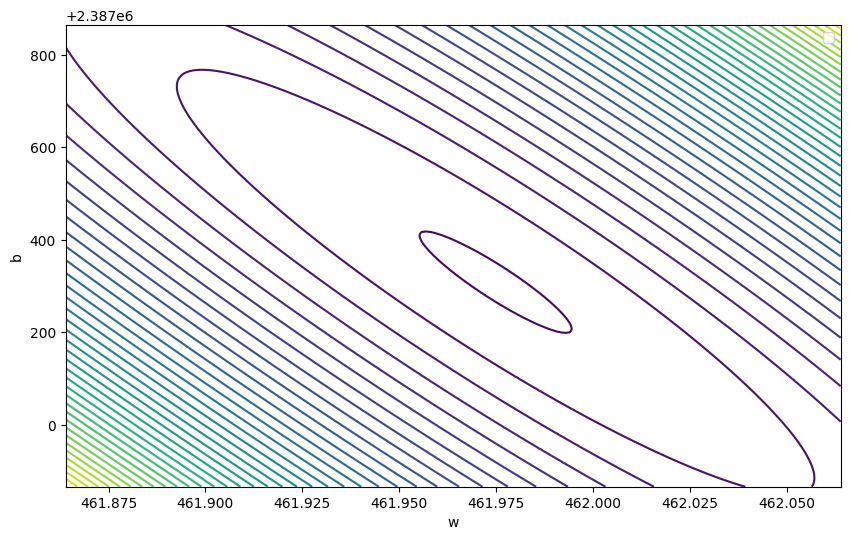

In [155]:
plt.figure(figsize=(10, 6))
contour = plt.contour(ww, bb, jj, levels=50, cmap='viridis')
plt.xlabel('w')
plt.ylabel('b')
plt.legend()
plt.show()

In [156]:
Wd = denormalize(area, price, np.array(W), np.array(B))["w"]
Bd = denormalize(area, price, np.array(W), np.array(B))["b"]

In [157]:
def find_plottable_size(w_shift, b_shift):
  for i, wi in enumerate(Wd):
    if abs(wi-w) < w_shift and abs(Bd[i]-b) < b_shift:
      return len(Wd) - i

lim = find_plottable_size(0.1, 500)

In [158]:
Wc, Bc = Wd[-lim:], Bd[-lim:]
Wc, Bc = Wc[::10], Bc[::10]

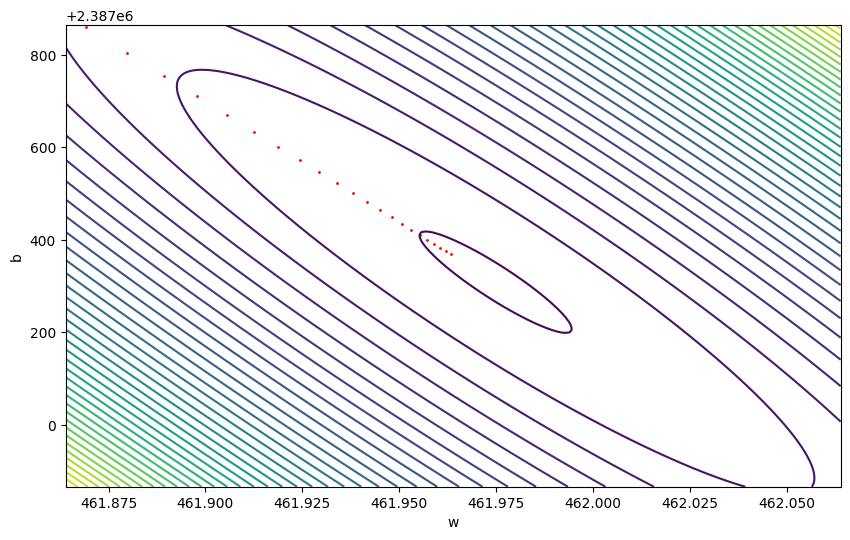

In [159]:
plt.figure(figsize=(10, 6))
plt.xlabel('w')
plt.ylabel('b')
plt.contour(ww, bb, jj, levels=50, cmap='viridis')
plt.scatter(Wc, Bc, s = 1, color = "red")
plt.show()